In [66]:
# We have a fuel economy dataset
# We need to predict the fuel economy using regression models
# Using model selection and hyperparameter tuning to find the best model.

In [67]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [68]:
# Importing dataset
df = pd.read_csv('FuelEconomy.csv')
df

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [69]:
df.isnull().sum()

Horse Power           0
Fuel Economy (MPG)    0
dtype: int64

In [70]:
df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


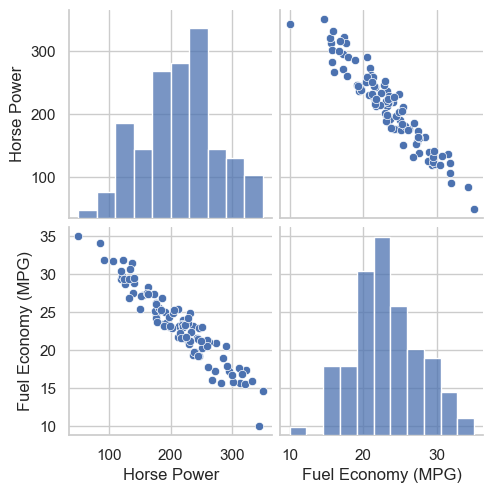

In [71]:
sns.pairplot(df)

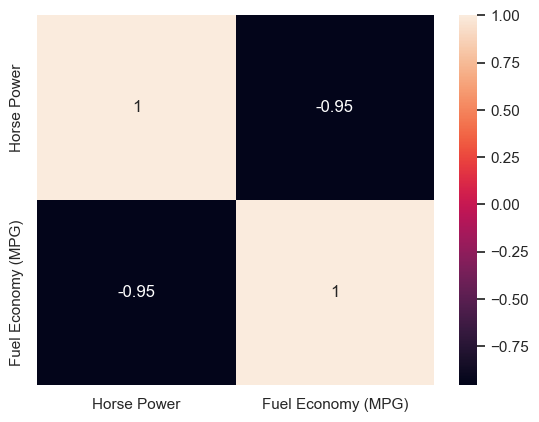

In [72]:
# Correlation
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [73]:
# Splitting the dataset
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [74]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [75]:
Y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [76]:
# Model selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
# List of models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
}

In [78]:
# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

In [79]:
# Storing the result of all models
result = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    result[name] = {
        'Model': name,
        'R2 Score': r2
    }
result

{'LinearRegression': {'Model': 'LinearRegression',
  'R2 Score': 0.9291686655135908},
 'Ridge': {'Model': 'Ridge', 'R2 Score': 0.9291691101854254},
 'Lasso': {'Model': 'Lasso', 'R2 Score': 0.9296386370771431},
 'SVR': {'Model': 'SVR', 'R2 Score': 0.8637572733867923},
 'DecisionTreeRegressor': {'Model': 'DecisionTreeRegressor',
  'R2 Score': 0.7830882396900829},
 'RandomForestRegressor': {'Model': 'RandomForestRegressor',
  'R2 Score': 0.8555232336664362},
 'KNeighborsRegressor': {'Model': 'KNeighborsRegressor',
  'R2 Score': 0.9130148874785752},
 'GradientBoostingRegressor': {'Model': 'GradientBoostingRegressor',
  'R2 Score': 0.8253517964565993},
 'AdaBoostRegressor': {'Model': 'AdaBoostRegressor',
  'R2 Score': 0.8641573649311808}}

In [80]:
# Viewing the result
model = []
r2 = []
for i in result.values():
    model.append(i['Model'])
    r2.append(i['R2 Score'])

In [81]:
model

['LinearRegression',
 'Ridge',
 'Lasso',
 'SVR',
 'DecisionTreeRegressor',
 'RandomForestRegressor',
 'KNeighborsRegressor',
 'GradientBoostingRegressor',
 'AdaBoostRegressor']

In [82]:
r2

[0.9291686655135908,
 0.9291691101854254,
 0.9296386370771431,
 0.8637572733867923,
 0.7830882396900829,
 0.8555232336664362,
 0.9130148874785752,
 0.8253517964565993,
 0.8641573649311808]

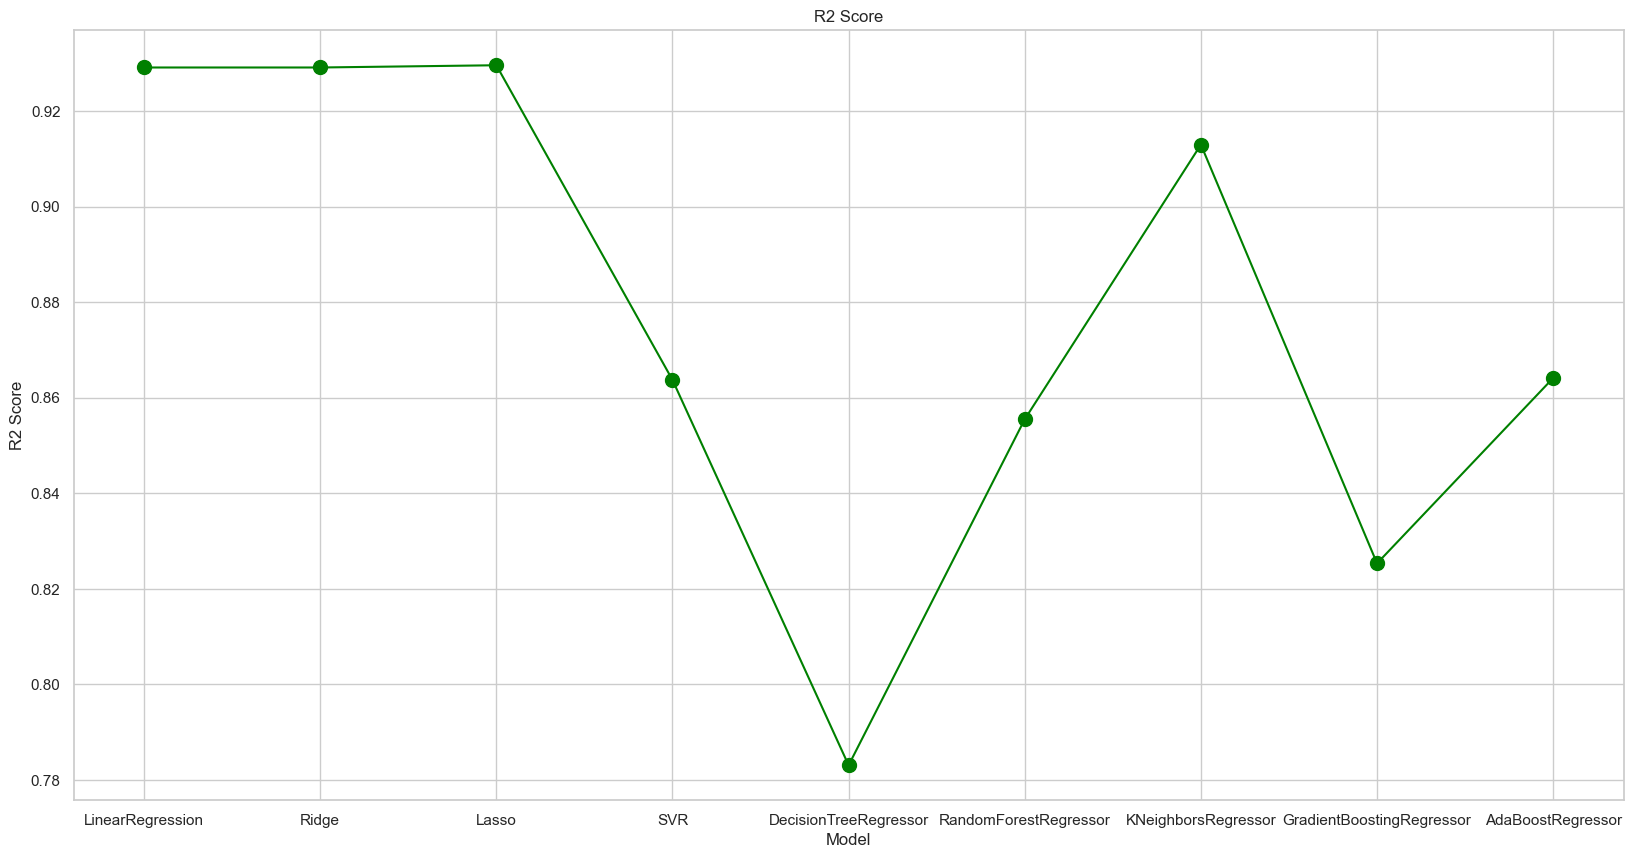

In [83]:
# Data visualization
plt.figure(figsize=(20, 10))
plt.scatter(model, r2, color='green', s=100)
plt.plot(model, r2, color='green')
plt.title('R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

In [84]:
# Taking best models
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [85]:
# Use hyperparameter tuning
params = {
    'LinearRegression': {
        'fit_intercept': [True, False],
    },
    'Ridge': {
        'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
        'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky, lsqr', 'sag', 'lbfgs']
    },
    'Lasso': {
        'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
        'fit_intercept': [True, False],
        'selection': ['cyclic', 'random']
    },
    'KNeighborsRegressor': {
        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    }
}

In [86]:
linear_grid = GridSearchCV(LinearRegression(), params['LinearRegression'], cv=5)
linear_grid.fit(X_train, y_train)
ridge_grid = GridSearchCV(Ridge(), params['Ridge'], cv=5)
ridge_grid.fit(X_train, y_train)
lasso_grid = GridSearchCV(Lasso(), params['Lasso'], cv=5)
lasso_grid.fit(X_train, y_train)
knn_grid = GridSearchCV(KNeighborsRegressor(), params['KNeighborsRegressor'], cv=5)
knn_grid.fit(X_train, y_train)

D:\Machine_Learning\Machine_Learning\Fuel_Economy\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
320 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Machine_Learning\Machine_Learning\Fuel_Economy\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Machine_Learning\Machine_Learning\Fuel_Economy\.venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Machine_Learning\Machine_Learning\Fuel_Economy\.venv\lib\site-packages\sklearn\

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [87]:
# Predicting the model
linear_pred = linear_grid.predict(X_test)
ridge_pred = ridge_grid.predict(X_test)
lasso_pred = lasso_grid.predict(X_test)
knn_pred = knn_grid.predict(X_test)

In [88]:
# Storing new results
new_result = {'LinearRegression': {
    'Model': 'LinearRegression',
    'R2 Score': r2_score(y_test, linear_pred)
}, 'Ridge': {
    'Model': 'Ridge',
    'R2 Score': r2_score(y_test, ridge_pred)
}, 'Lasso': {
    'Model': 'Lasso',
    'R2 Score': r2_score(y_test, lasso_pred)
}, 'KNeighborsRegressor': {
    'Model': 'KNeighborsRegressor',
    'R2 Score': r2_score(y_test, knn_pred)
}}

In [89]:
# New result
new_result

{'LinearRegression': {'Model': 'LinearRegression',
  'R2 Score': 0.9291686655135908},
 'Ridge': {'Model': 'Ridge', 'R2 Score': 0.9291374976584499},
 'Lasso': {'Model': 'Lasso', 'R2 Score': 0.9296386370771431},
 'KNeighborsRegressor': {'Model': 'KNeighborsRegressor',
  'R2 Score': 0.885851969009572}}

In [93]:
result

{'LinearRegression': {'Model': 'LinearRegression',
  'R2 Score': 0.9291686655135908},
 'Ridge': {'Model': 'Ridge', 'R2 Score': 0.9291691101854254},
 'Lasso': {'Model': 'Lasso', 'R2 Score': 0.9296386370771431},
 'SVR': {'Model': 'SVR', 'R2 Score': 0.8637572733867923},
 'DecisionTreeRegressor': {'Model': 'DecisionTreeRegressor',
  'R2 Score': 0.7830882396900829},
 'RandomForestRegressor': {'Model': 'RandomForestRegressor',
  'R2 Score': 0.8555232336664362},
 'KNeighborsRegressor': {'Model': 'KNeighborsRegressor',
  'R2 Score': 0.9130148874785752},
 'GradientBoostingRegressor': {'Model': 'GradientBoostingRegressor',
  'R2 Score': 0.8253517964565993},
 'AdaBoostRegressor': {'Model': 'AdaBoostRegressor',
  'R2 Score': 0.8641573649311808}}

In [90]:
new_models = []
new_accuracy = []
for i in new_result.values():
    new_models.append(i['Model'])
    new_accuracy.append(i['R2 Score'])

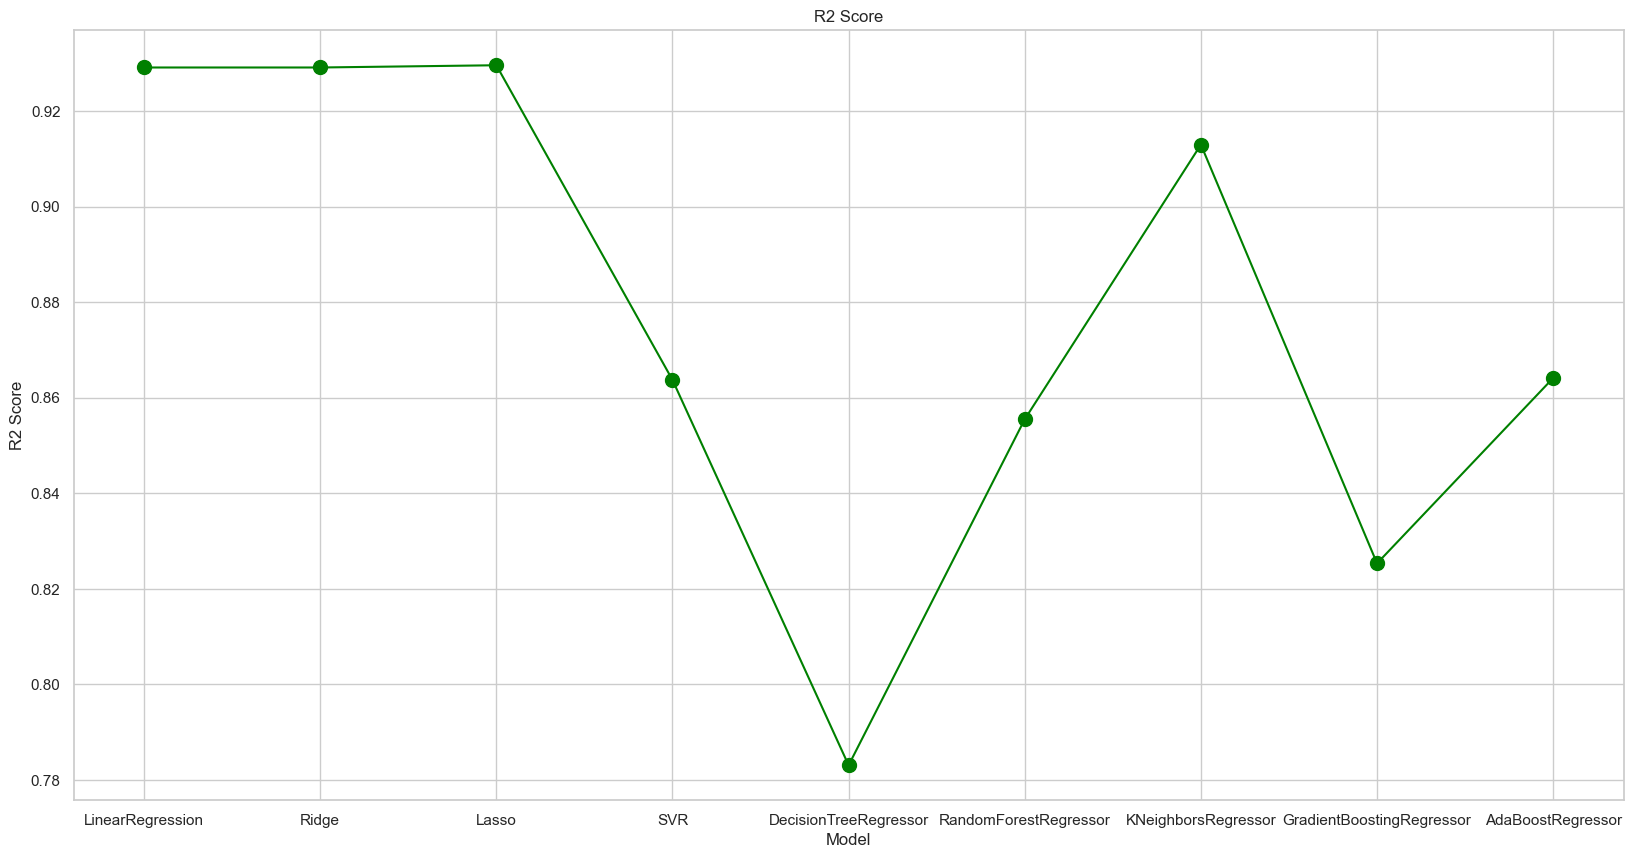

In [91]:
# Data visualization old data
plt.figure(figsize=(20, 10))
plt.scatter(model, r2, color='green', s=100)
plt.plot(model, r2, color='green')
plt.title('R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

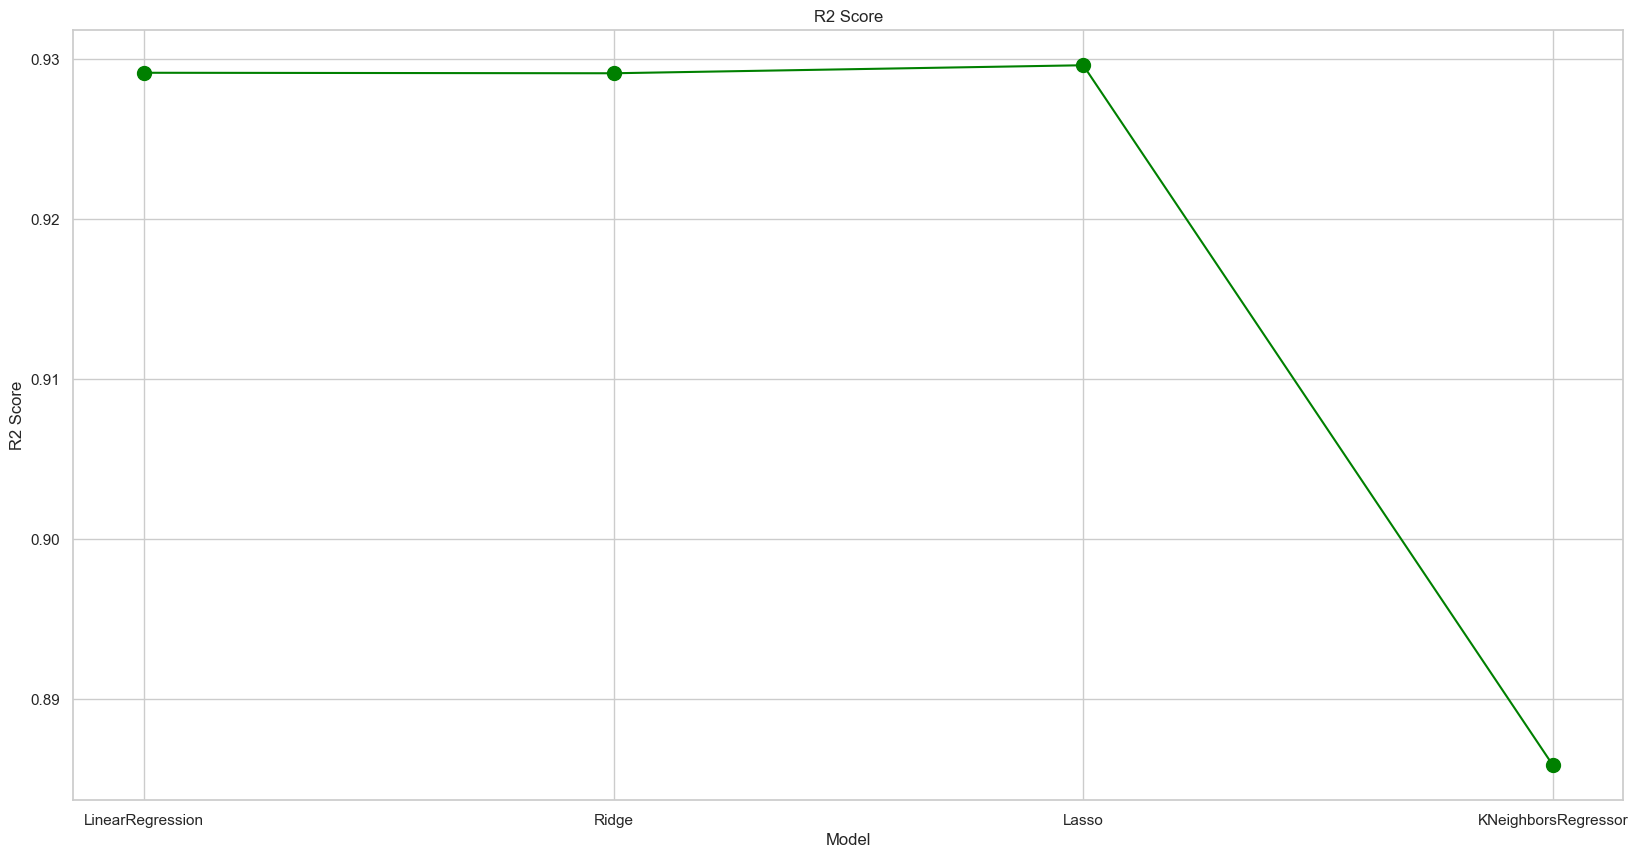

In [92]:
# Data visualization new data
plt.figure(figsize=(20, 10))
plt.scatter(new_models, new_accuracy, color='green', s=100)
plt.plot(new_models, new_accuracy, color='green')
plt.title('R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()